In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/newdiabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape

(2000, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
df['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [ ]:
df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                 301
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

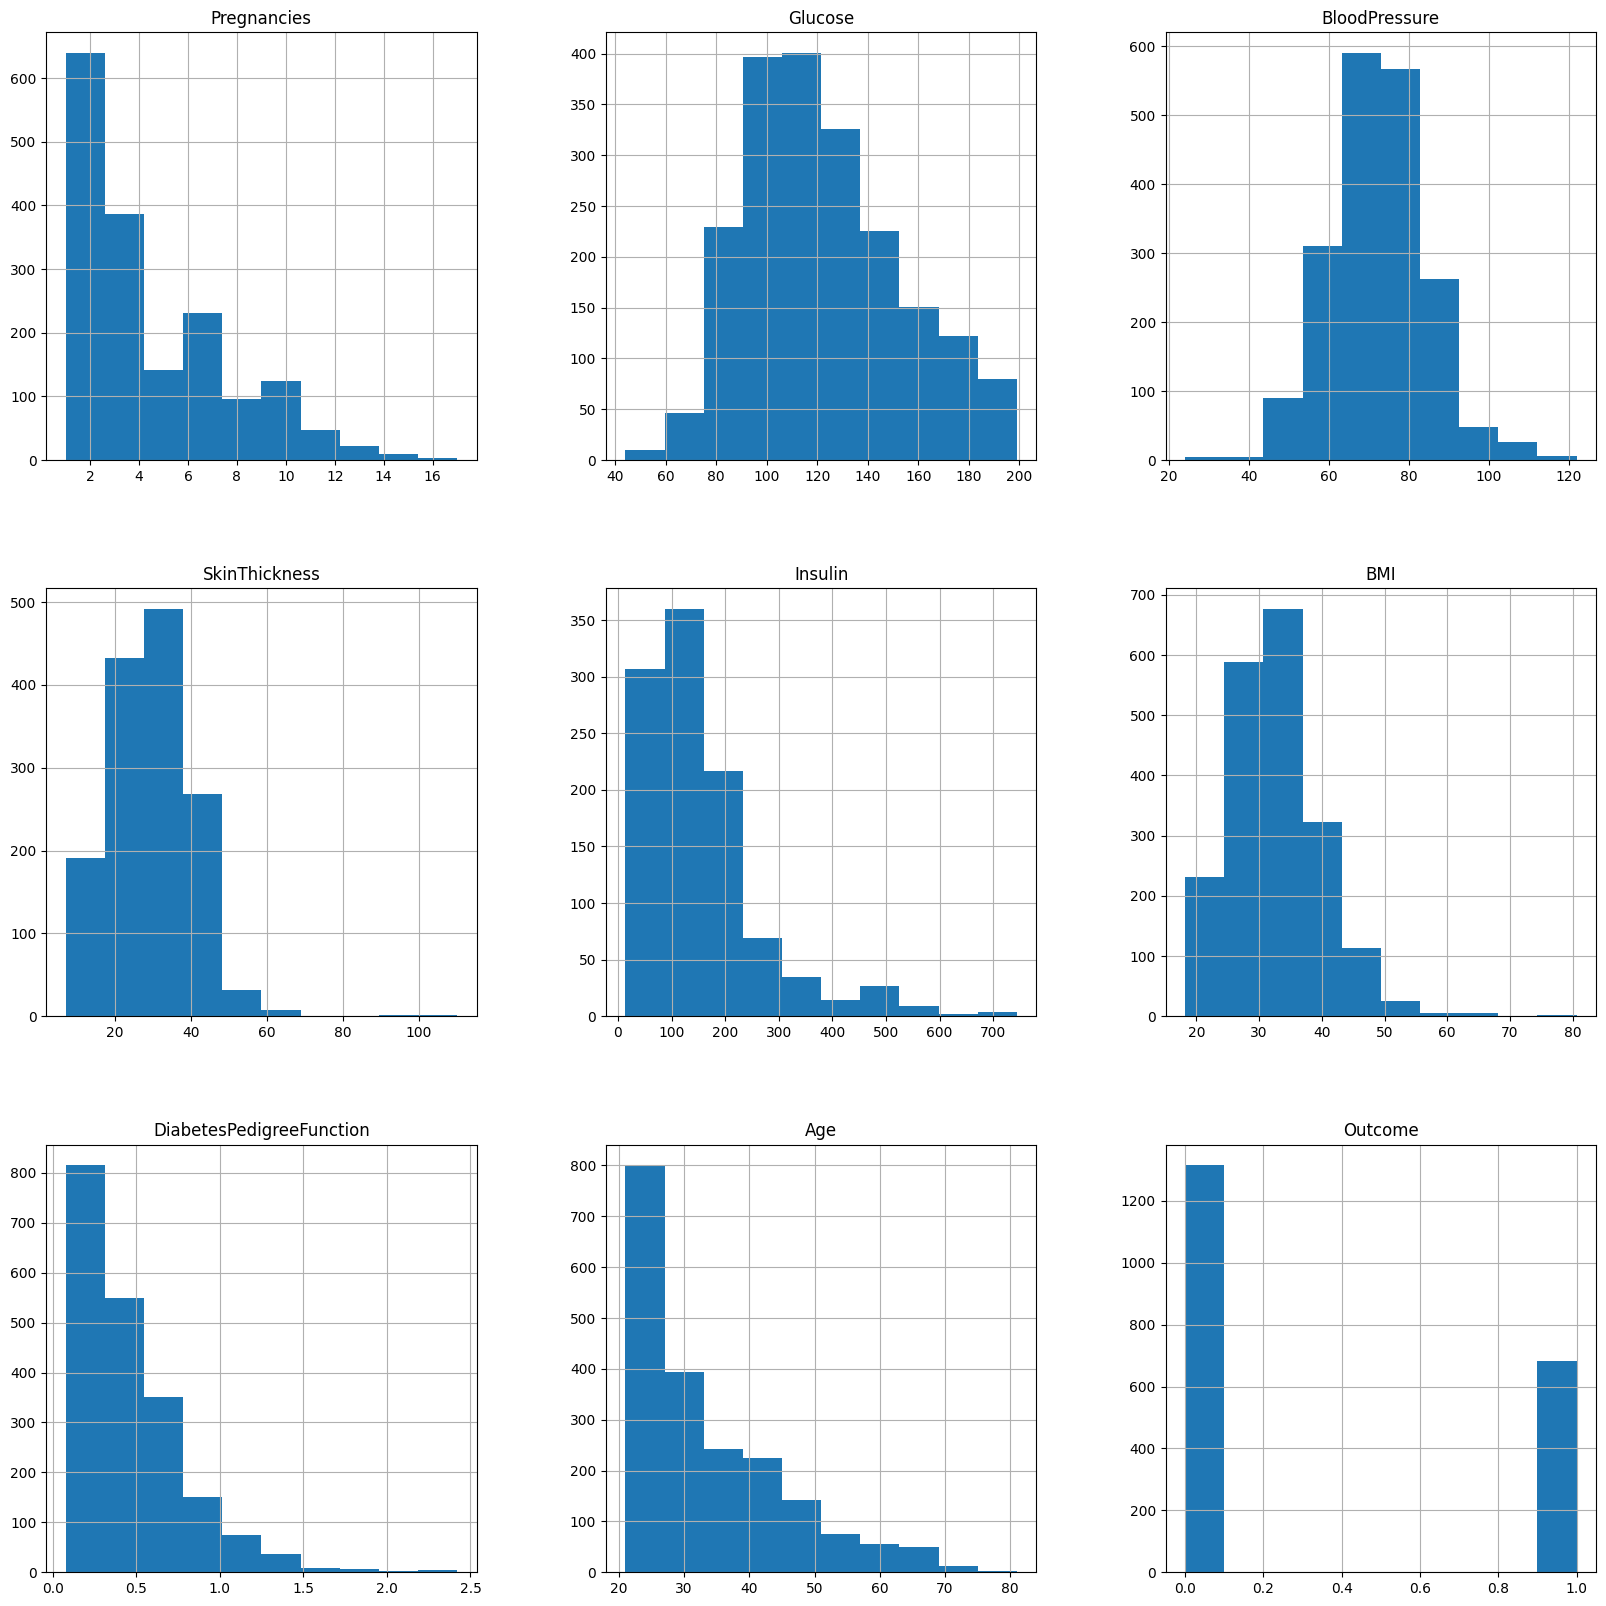

In [ ]:
p = df.hist(figsize = (20, 20))

In [ ]:
df['Pregnancies'].fillna(df['Pregnancies'].median(), inplace = True)
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Glucose'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

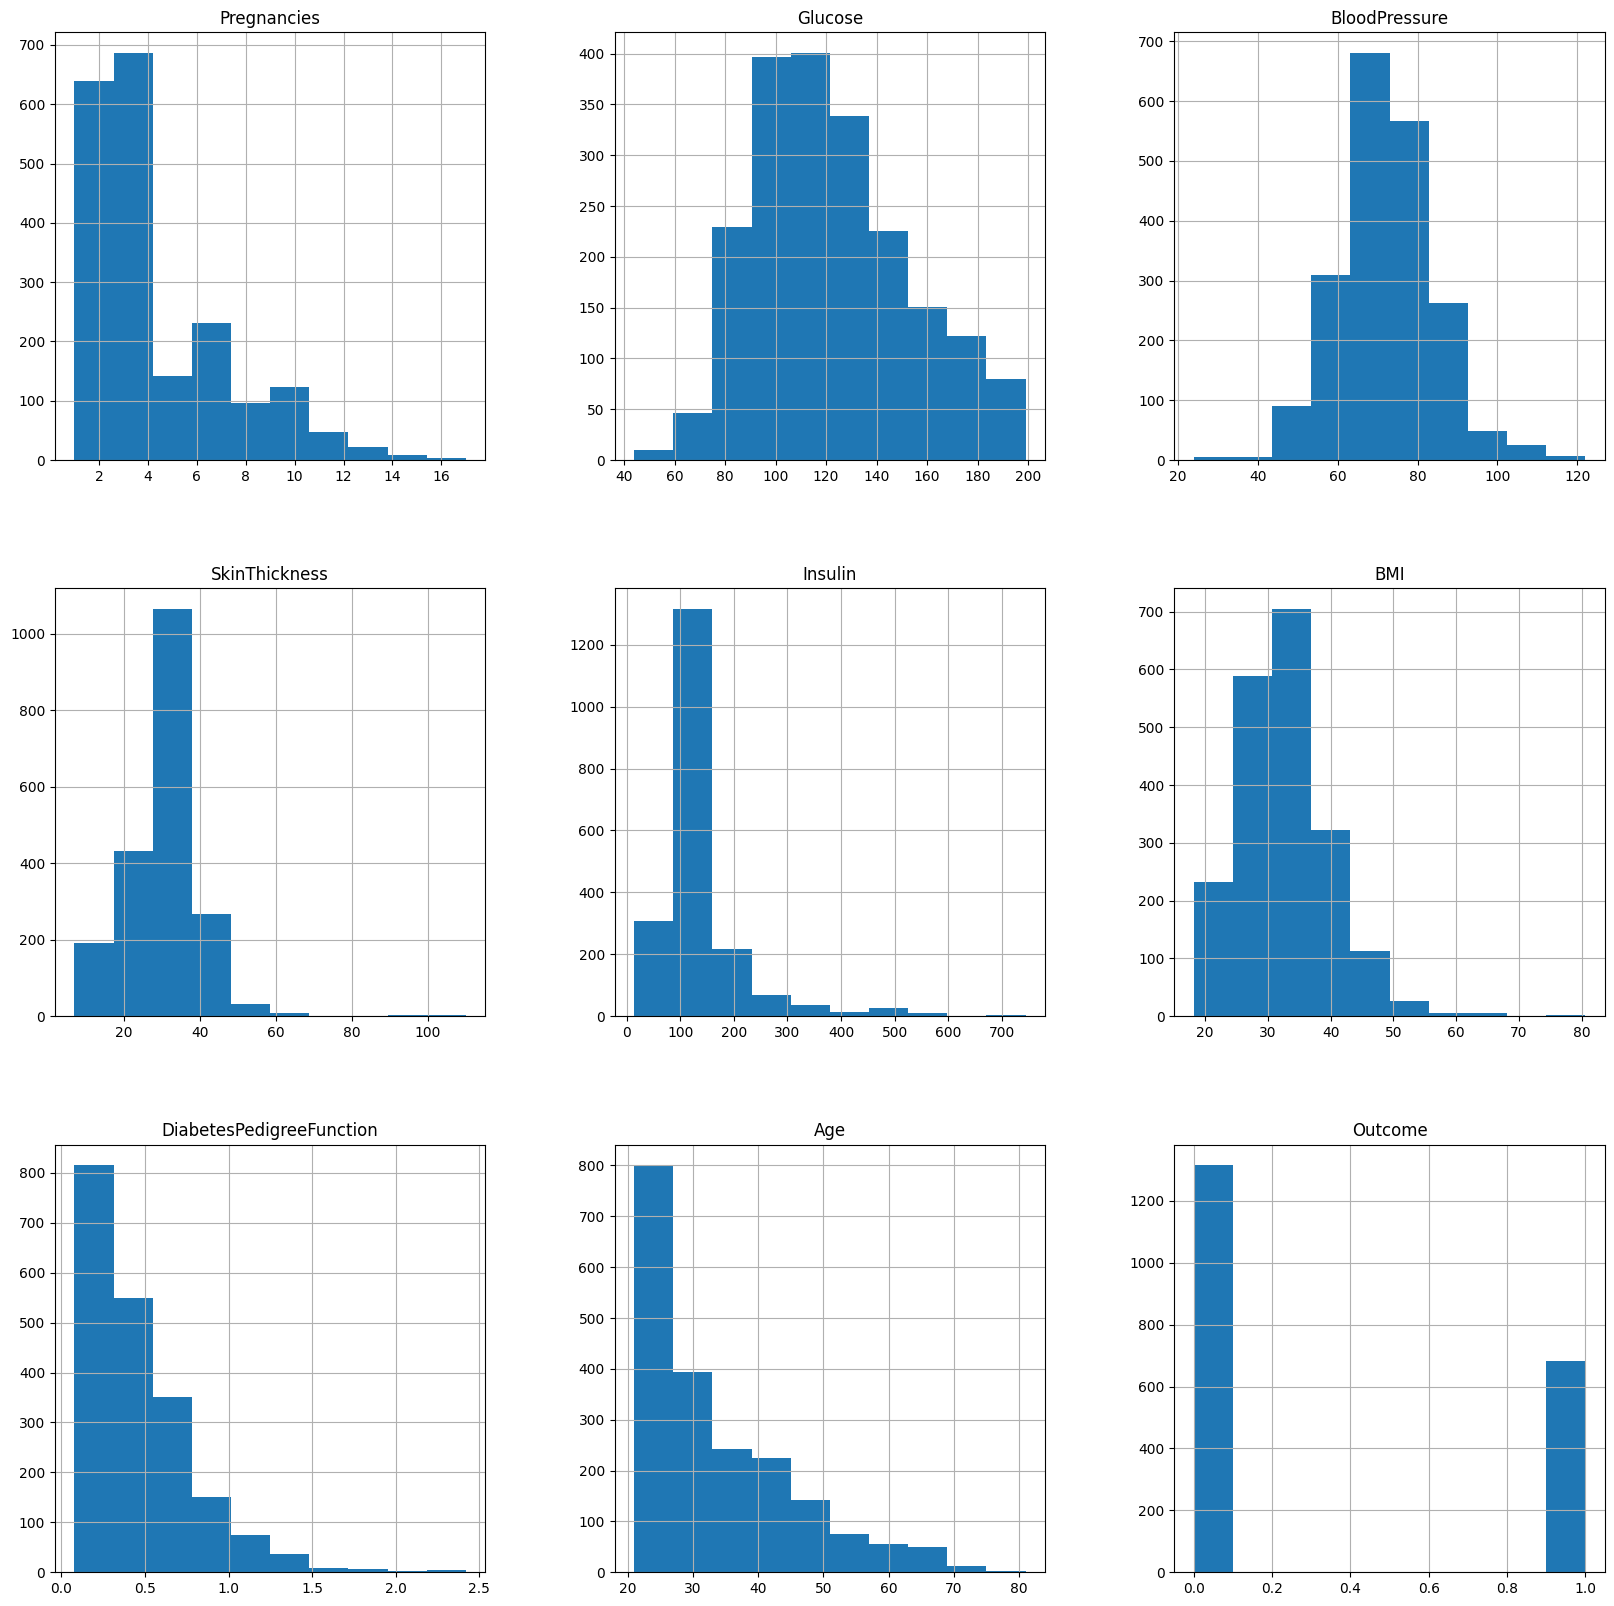

In [ ]:
p = df.hist(figsize=(20,20))

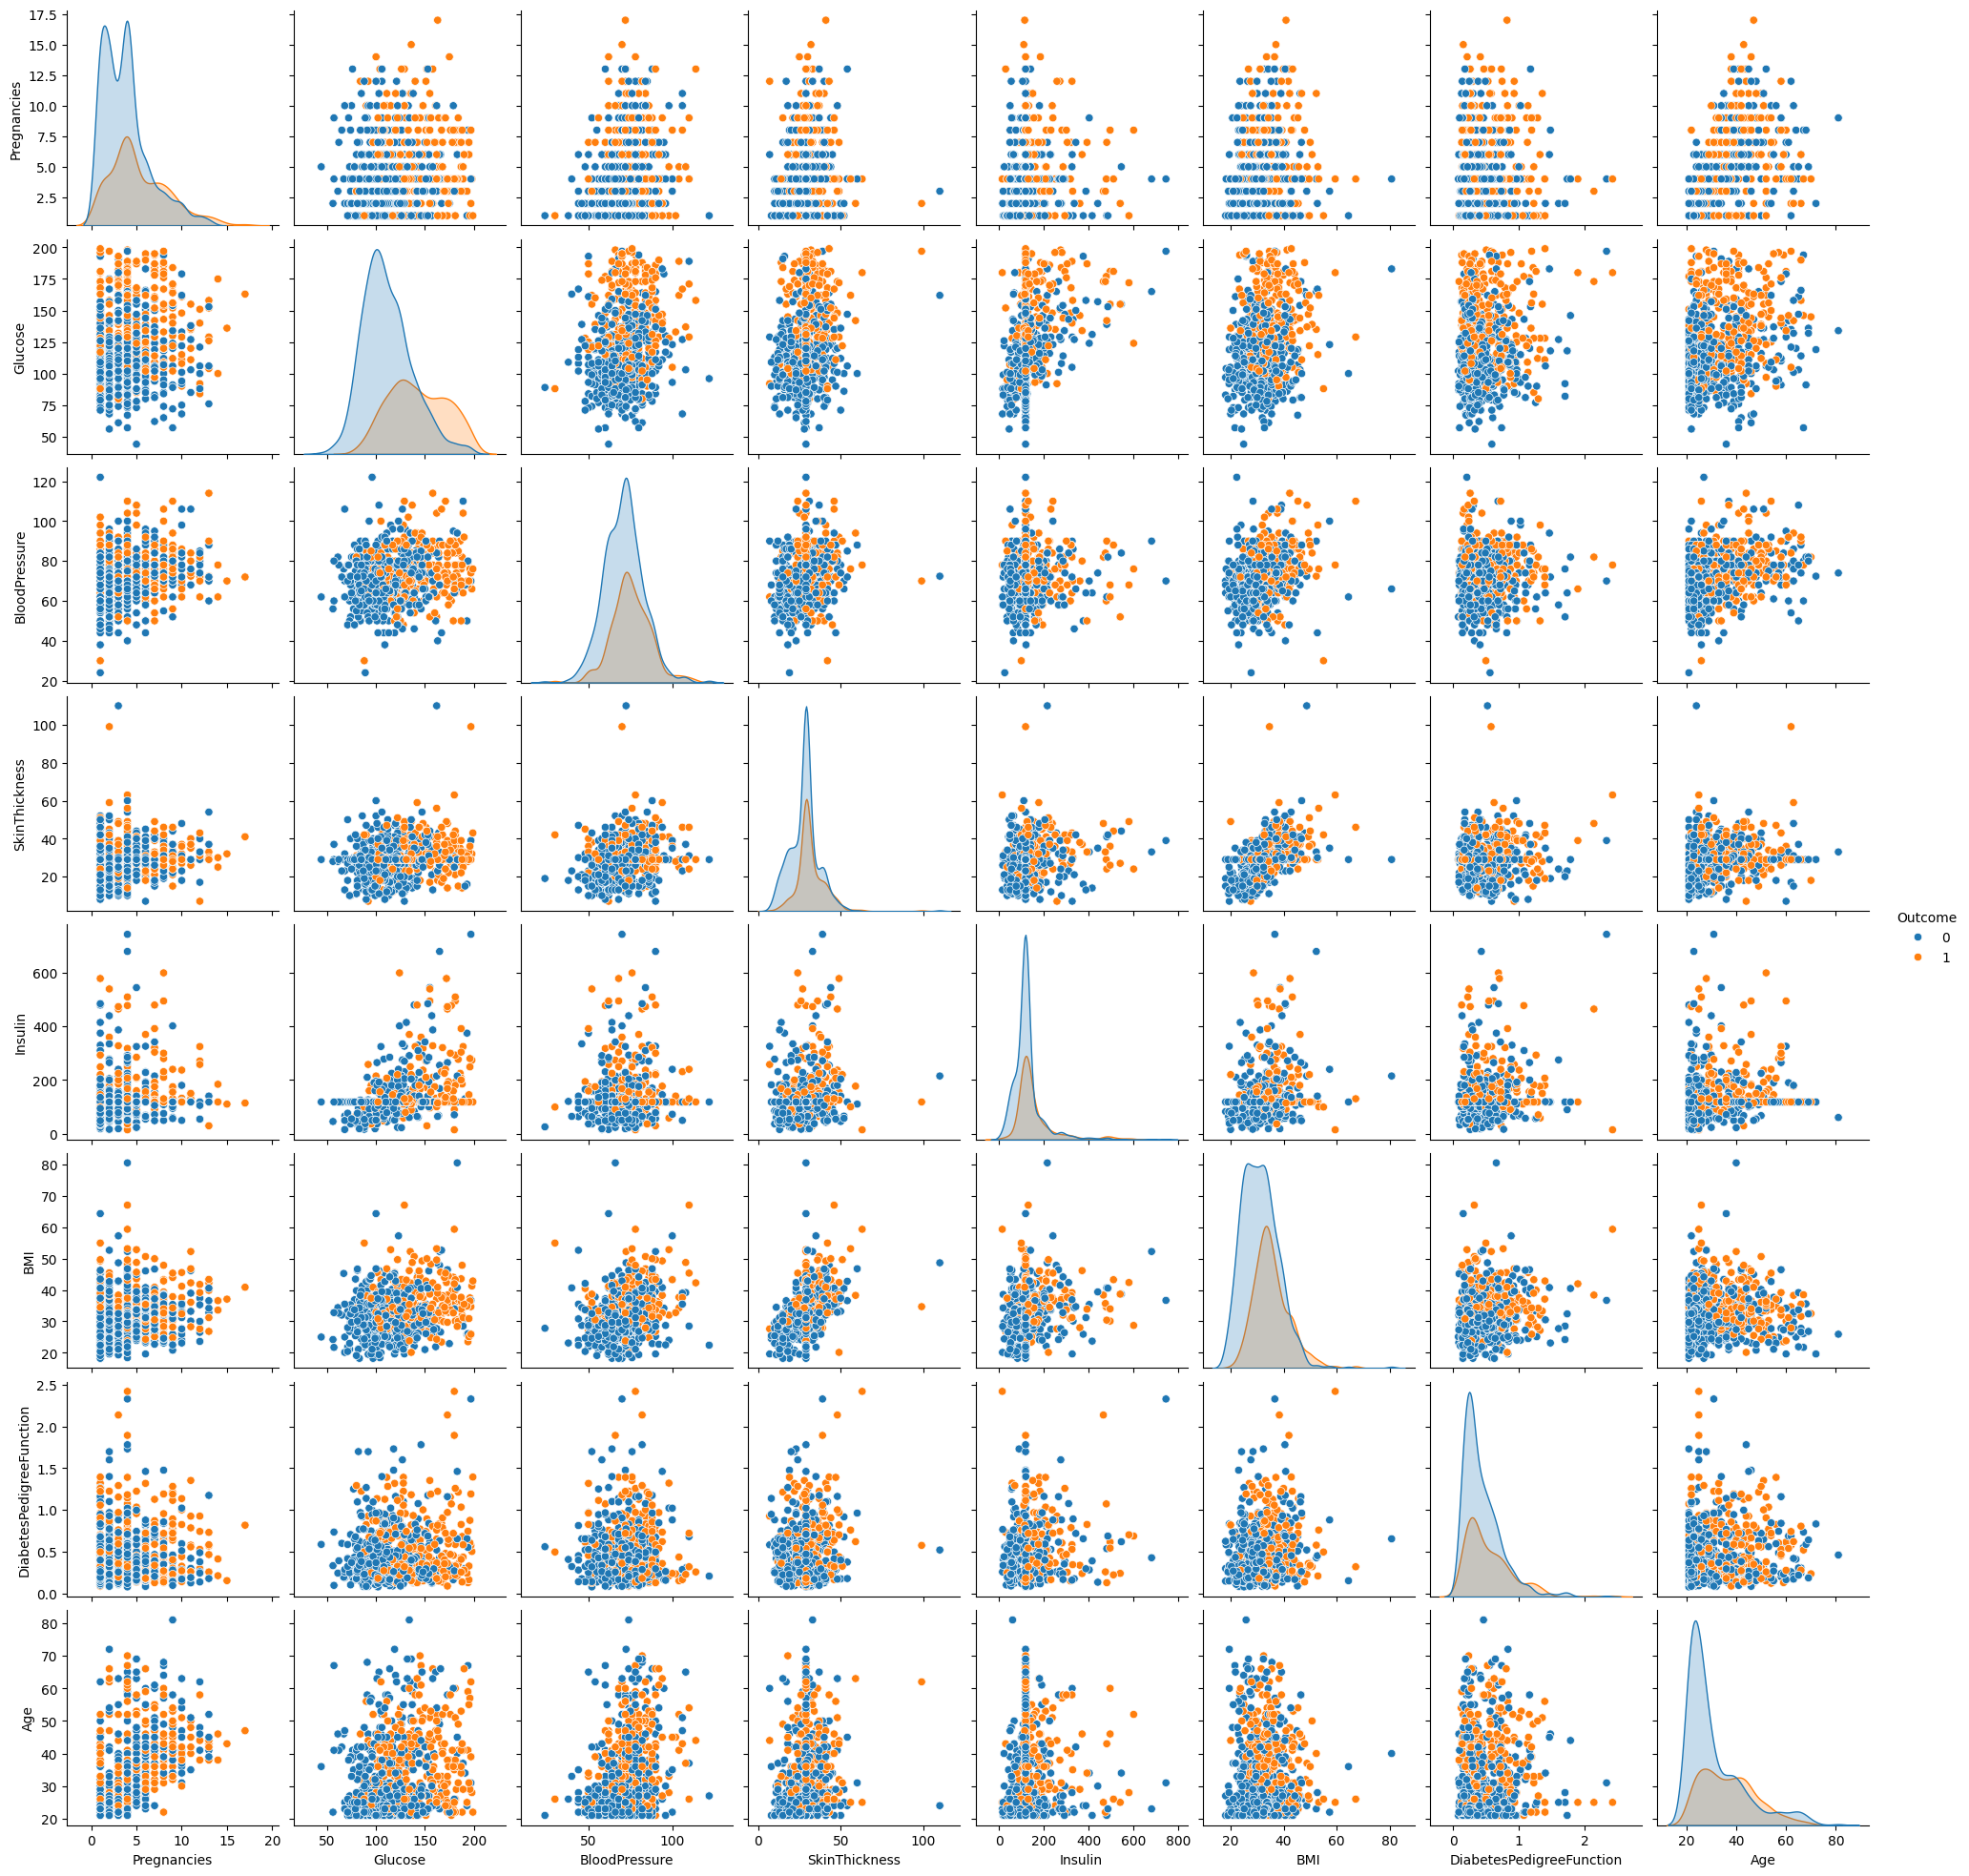

In [ ]:
sns.pairplot(data = df, hue = 'Outcome')

<Axes: xlabel='Outcome'>

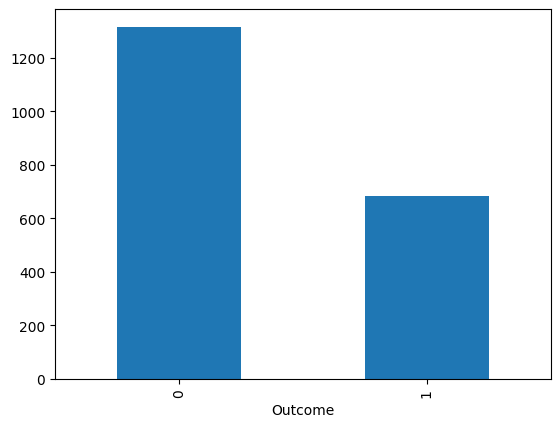

In [ ]:
df['Outcome'].value_counts().plot(kind = 'bar')

<Axes: >

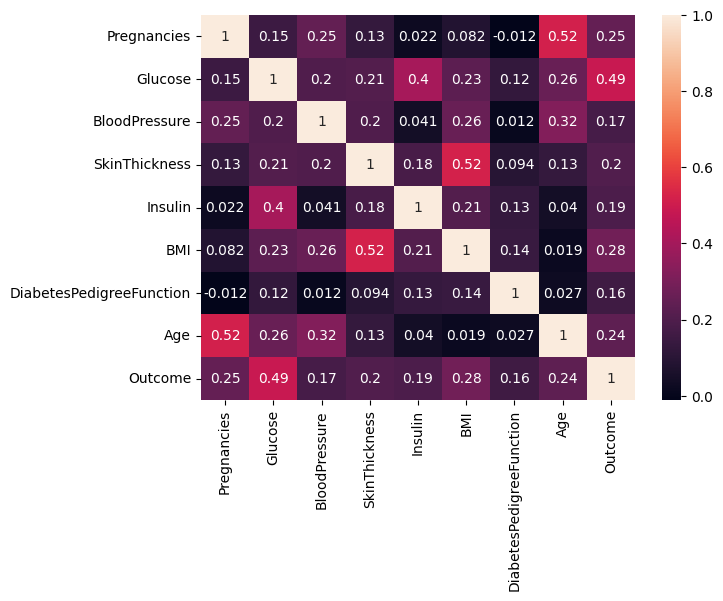

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))

new_df = scaler.fit_transform(df)

In [ ]:
dataset_scaled = pd.DataFrame(new_df)

In [ ]:
dataset_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.0625,0.606452,0.387755,0.271845,0.142466,0.246795,0.020922,0.433333,1.0
1,0.1875,0.258065,0.591837,0.233010,0.152055,0.320513,0.066183,0.033333,0.0
2,0.1875,0.651613,0.493915,0.213592,0.142466,0.416667,0.235696,0.166667,1.0
3,0.1875,0.587097,0.448980,0.339806,0.323288,0.386218,0.122545,0.050000,1.0
4,0.0000,0.612903,0.387755,0.330097,0.638356,0.360577,0.195559,0.000000,0.0


In [ ]:
X = dataset_scaled.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset_scaled.iloc[:, 8].values

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.20, random_state=42, stratify=Y_resampled)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
Models = [RandomForestClassifier(random_state = 42), DecisionTreeClassifier(random_state = 42), GaussianNB(), KNeighborsClassifier(), GradientBoostingClassifier(random_state = 42), SVC(random_state = 42) ]

In [ ]:
def compare_models():
  for model in Models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, Y_test)
    recall = recall_score(y_pred, Y_test)
    f1score = f1_score(y_pred, Y_test)
    precision = precision_score(y_pred, Y_test)
    print("Accuracy for ", model, "is ", accuracy)
    print("Recall for ", model, "is ", recall)
    print("f1_score for ", model, "is ", f1score)
    print("Precision for ", model, "is ", precision)

In [ ]:
compare_models()

Accuracy for  RandomForestClassifier(random_state=42) is  0.9829222011385199
Recall for  RandomForestClassifier(random_state=42) is  0.9738805970149254
f1_score for  RandomForestClassifier(random_state=42) is  0.983050847457627
Precision for  RandomForestClassifier(random_state=42) is  0.9923954372623575
Accuracy for  DecisionTreeClassifier(random_state=42) is  0.9772296015180265
Recall for  DecisionTreeClassifier(random_state=42) is  0.9771863117870723
f1_score for  DecisionTreeClassifier(random_state=42) is  0.9771863117870723
Precision for  DecisionTreeClassifier(random_state=42) is  0.9771863117870723
Accuracy for  GaussianNB() is  0.7703984819734345
Recall for  GaussianNB() is  0.7933884297520661
f1_score for  GaussianNB() is  0.7603960396039604
Precision for  GaussianNB() is  0.7300380228136882
Accuracy for  KNeighborsClassifier() is  0.8747628083491461
Recall for  KNeighborsClassifier() is  0.8316498316498316
f1_score for  KNeighborsClassifier() is  0.8821428571428571
Precision 

In [ ]:
#SVC
parameters = {
              'kernel': ['linear', 'poly', 'rbf'],
    'C': np.logspace(-3, 3, 10),
     'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],
    'class_weight': [None, 'balanced']
}

In [ ]:
#gridsearchcv
classifier = RandomizedSearchCV(SVC(random_state = 42), parameters, cv = 5)

In [ ]:
classifier.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42),
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'class_weight': [None, 'balanced'],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([0.14782996, 0.18871922, 0.05689855, 0.07828975, 0.22042632,
        0.09155598, 0.0803968 , 0.10474267, 0.07803445, 0.07611804]),
 'std_fit_time': array([0.02425476, 0.00833164, 0.00262792, 0.00627099, 0.01245226,
        0.00175755, 0.00914318, 0.00280252, 0.00914848, 0.00726962]),
 'mean_score_time': array([0.04155059, 0.02101312, 0.01222677, 0.01445675, 0.01145792,
        0.02114668, 0.01298051, 0.02156291, 0.01457539, 0.01503873]),
 'std_score_time': array([0.00919795, 0.00076674, 0.00048679, 0.00218237, 0.000252  ,
        0.0001811 , 0.00022303, 0.00046959, 0.0003655 , 0.00017845]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'linear', 'poly', 'linear', 'poly',
                    'poly', 'rbf', 'poly', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 0.1, 0.001, 1, 0.01, 0.001, 1, 0.1, 1

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, 'class_weight': None, 'C': 1000.0}


In [ ]:
highest_accuracy = classifier.best_score_
print(round((highest_accuracy * 100),2), '%')

80.76 %


In [ ]:
svc_model = SVC(C = 1000.0, kernel = 'rbf', gamma = 0.1, degree = 4, class_weight = None, random_state = 42 )

In [ ]:
svc_model.fit(X_train, Y_train)

SVC(C=1000.0, degree=4, gamma=0.1, random_state=42)

In [ ]:
Y_pred = svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_pred, Y_test)
recall = recall_score(Y_pred, Y_test)
f1score = f1_score(Y_pred, Y_test)
precision = precision_score(Y_pred, Y_test)

In [ ]:
print("accuracy for ","is ", accuracy * 100)
print("recall for ","is ", recall * 100)
print("f1_score for ","is ", f1score * 100)
print("precision for ","is ", precision * 100)

accuracy for  is  83.30170777988614
recall for  is  80.27681660899654
f1_score for  is  84.05797101449276
precision for  is  88.212927756654


RANDOM FOREST

In [ ]:
param_grid = {
    'n_estimators': [10,50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

In [ ]:
rf_classifier = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5)

In [ ]:
rf_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 5, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]})

In [ ]:
rf_classifier.cv_results_

{'mean_fit_time': array([0.18077135, 0.1589992 , 0.15671716, 0.16051579, 0.67738605,
        0.32445621, 1.04417572, 1.26466184, 0.79348888, 0.2223691 ]),
 'std_fit_time': array([0.00827609, 0.00538535, 0.00474443, 0.00496751, 0.01245531,
        0.004915  , 0.18155905, 0.03786831, 0.12460249, 0.00529683]),
 'mean_score_time': array([0.00652161, 0.00673738, 0.00670991, 0.00696454, 0.02430439,
        0.01243343, 0.02636442, 0.015064  , 0.0278264 , 0.00678692]),
 'std_score_time': array([1.01394755e-04, 1.61010589e-04, 2.09846092e-04, 6.70166638e-04,
        5.10803958e-04, 3.34881572e-04, 4.22476147e-03, 4.24324846e-04,
        3.86378927e-03, 5.15395901e-05]),
 'param_n_estimators': masked_array(data=[50, 50, 50, 50, 200, 100, 200, 150, 200, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 10, 10, 10, 5, 5, 10, 5, 10,

In [ ]:
rf_classifier.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

In [ ]:
rf_highest_accuracy = rf_classifier.best_score_
print(rf_highest_accuracy * 100)

96.48456057007125


{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

In [ ]:
rf_model = RandomForestClassifier( n_estimators = 50, min_samples_split = 2, min_samples_leaf = 2, max_features = 'log2', max_depth = None, class_weight ='balanced', bootstrap = False)

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=50)

In [ ]:
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_pred_rf, Y_test)
recall = recall_score(Y_pred_rf, Y_test)
f1score = f1_score(Y_pred_rf, Y_test)
precision = precision_score(Y_pred_rf, Y_test)

In [ ]:
print("accuracy for ","is ", accuracy * 100)
print("recall for ","is ", recall * 100)
print("f1_score for ","is ", f1score * 100)
print("precision for ","is ", precision * 100)

accuracy for  is  98.4819734345351
recall for  is  97.39776951672863
f1_score for  is  98.49624060150376
precision for  is  99.61977186311786


KNN

In [ ]:
param_knn = {
    'n_neighbors': [3,5,10,20,50],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [10,20,30,50],
    'metric': ['euclidean','manhattan','minkowski']
}

In [ ]:
knn_classifier = GridSearchCV(KNeighborsClassifier(), param_knn, cv = 5)

In [ ]:
knn_classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 10, 20, 50], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_classifier.cv_results_

{'mean_fit_time': array([0.00532479, 0.00405269, 0.00435467, 0.00498295, 0.0051517 ,
        0.00276489, 0.00247431, 0.00238762, 0.00243783, 0.0027874 ,
        0.00277328, 0.00241547, 0.0025197 , 0.00246348, 0.00244689,
        0.00237875, 0.00283775, 0.00269604, 0.00258155, 0.0024776 ,
        0.00244565, 0.00244284, 0.00298967, 0.00249362, 0.00238671,
        0.00242438, 0.00251493, 0.00243659, 0.00276246, 0.00240078,
        0.00310707, 0.00242982, 0.00241947, 0.00240932, 0.00280342,
        0.00241084, 0.00245161, 0.00249434, 0.00271077, 0.00247159,
        0.00246668, 0.00238657, 0.00268021, 0.00238924, 0.00246296,
        0.00309319, 0.00270143, 0.00238471, 0.00241075, 0.00249248,
        0.00243363, 0.00249572, 0.00240135, 0.00241165, 0.00245438,
        0.00247388, 0.00251827, 0.00242143, 0.00255413, 0.00242515,
        0.00217552, 0.00224566, 0.00221367, 0.00219793, 0.00223632,
        0.00224643, 0.00249095, 0.00368147, 0.00362077, 0.00351253,
        0.00355058, 0.00393763,

In [ ]:
knn_classifier.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_accuracy = knn_classifier.best_score_
print(knn_accuracy * 100)

96.67458432304038


In [ ]:
knn_model = KNeighborsClassifier(weights = 'distance', p = 1, n_neighbors = 5, metric = 'euclidean', leaf_size = 10, algorithm= 'auto')

In [ ]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=10, metric='euclidean', p=1, weights='distance')

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
knn_accu = accuracy_score(y_pred_knn, Y_test)
knn_recall = recall_score(y_pred_knn, Y_test)
knn_f1score = f1_score(y_pred_knn, Y_test)
knn_precision = precision_score(y_pred_knn, Y_test)

In [ ]:
print("accuracy for ","is ", knn_accu * 100)
print("recall for ","is ", knn_recall * 100)
print("f1_score for ","is ", knn_f1score * 100)
print("precision for ","is ", knn_precision * 100)

accuracy for  is  97.91271347248576
recall for  is  96.66666666666667
f1_score for  is  97.93621013133207
precision for  is  99.23954372623575


In [ ]:
#decision trees

param_d = {
  'criterion' : ['gini', 'entropy'],
  'max_depth' : [None, 2, 5, 10, 15, 20],
  'min_samples_split' : [2, 5, 10],
  'min_samples_leaf' : [1, 3, 5],
  'max_features' : ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7, 0.9],
  'min_impurity_decrease' : [0.0, 0.0001, 0.001, 0.01],
  'max_leaf_nodes' : [None, 10, 50, 100],
  'class_weight' : [None, 'balanced']
}

In [ ]:
dt_classifier = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_d, cv = 5)

In [ ]:
dt_classifier.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.1, 0.3, 0.5, 0.7,
                                                         0.9],
                                        'max_leaf_nodes': [None, 10, 50, 100],
                                        'min_impurity_decrease': [0.0, 0.0001,
                                                                  0.001, 0.01],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10]})

In [ ]:
dt_classifier.cv_results_

{'mean_fit_time': array([0.00207734, 0.00378728, 0.00327597, 0.0040062 , 0.00571952,
        0.0050148 , 0.00216522, 0.00181279, 0.00263376, 0.0025651 ]),
 'std_fit_time': array([6.06664533e-04, 5.96828653e-04, 1.99763471e-05, 1.76806782e-04,
        3.41411796e-04, 4.82749751e-04, 5.69744476e-04, 7.11497287e-05,
        1.64680806e-05, 3.57451077e-05]),
 'mean_score_time': array([0.00087061, 0.00073662, 0.0006464 , 0.00069122, 0.00075712,
        0.0006772 , 0.00073791, 0.00063763, 0.0006989 , 0.00063963]),
 'std_score_time': array([1.74514231e-04, 9.54228002e-05, 2.18063216e-05, 8.05227329e-05,
        1.74133892e-04, 2.60501512e-05, 1.69212033e-04, 5.51690495e-06,
        1.02047898e-04, 1.02585395e-05]),
 'param_min_samples_split': masked_array(data=[2, 5, 10, 10, 5, 10, 2, 10, 5, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_arr

In [ ]:
dt_classifier.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0001,
 'max_leaf_nodes': 100,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [ ]:
dt_accuracy = dt_classifier.best_score_
print(knn_accuracy * 100)

96.67458432304038


{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None}

In [ ]:
dt_model = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 1, min_impurity_decrease = 0.0, max_leaf_nodes = None, max_features = 'sqrt', max_depth = None, criterion = 'entropy', class_weight = 'balanced' , random_state = 42)

In [ ]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
dt_accu = accuracy_score(y_pred_dt, Y_test)
dt_recall = recall_score(y_pred_dt, Y_test)
dt_f1score = f1_score(y_pred_dt, Y_test)
dt_precision = precision_score(y_pred_dt, Y_test)

In [ ]:
print("accuracy for ","is ", dt_accu * 100)
print("recall for ","is ", dt_recall * 100)
print("f1_score for ","is ", dt_f1score * 100)
print("precision for ","is ", dt_precision * 100)

accuracy for  is  92.78937381404174
recall for  is  93.10344827586206
f1_score for  is  92.74809160305342
precision for  is  92.39543726235742


In [ ]:
#xgboost

params_xgb = {
  'max_depth' : [3, 5, 7, 9, 11],
  'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
  'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
  'n_estimators' : [100, 200, 300, 400, 500],
  'ccp_alpha' : [0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

In [ ]:
xgb_classifier = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params_xgb, cv = 5)

In [ ]:
xgb_classifier.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'ccp_alpha': [0, 0.0001, 0.001, 0.01,
                                                      0.02, 0.03, 0.04, 0.05,
                                                      0.06, 0.07, 0.08, 0.09,
                                                      0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]})

In [ ]:
xgb_classifier.cv_results_

{'mean_fit_time': array([2.45157943, 1.18349528, 1.55507379, 1.42784271, 1.07230482,
        2.58060575, 0.31735215, 2.50159492, 2.28677492, 0.36298151]),
 'std_fit_time': array([0.17882523, 0.01316229, 0.18382154, 0.19772501, 0.04665903,
        0.29433379, 0.00322721, 0.24782089, 0.1845514 , 0.00300133]),
 'mean_score_time': array([0.00190997, 0.00167589, 0.00196772, 0.00168934, 0.00133839,
        0.00175447, 0.00133739, 0.00182843, 0.00521412, 0.00124249]),
 'std_score_time': array([2.98378694e-04, 3.00651028e-05, 7.85880750e-04, 2.83543693e-04,
        2.57401980e-05, 3.00427217e-04, 3.85311705e-04, 3.82312440e-04,
        3.85171501e-04, 4.81467652e-05]),
 'param_subsample': masked_array(data=[1.0, 0.5, 0.6, 0.6, 0.8, 0.7, 0.5, 0.9, 0.6, 0.6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500, 400, 300, 200, 400, 100, 

In [ ]:
xgb_classifier.best_params_

{'subsample': 0.6,
 'n_estimators': 300,
 'max_depth': 11,
 'learning_rate': 0.01,
 'ccp_alpha': 0.001}

{'subsample': 0.6,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.1,
 'ccp_alpha': 0.001}

In [ ]:
xgb_accuracy = xgb_classifier.best_score_
print(xgb_accuracy * 100)

88.83610451306414


In [ ]:
xgb_model = GradientBoostingClassifier( subsample = 0.6, n_estimators = 50, max_depth = 5, learning_rate = 0.1, ccp_alpha = 0.001, random_state=42)

In [ ]:
xgb_model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.001, max_depth=5, n_estimators=50,
                           random_state=42, subsample=0.6)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
xgb_accu = accuracy_score(y_pred_xgb, Y_test)
xgb_recall = recall_score(y_pred_xgb, Y_test)
xgb_f1score = f1_score(y_pred_xgb, Y_test)
xgb_precision = precision_score(y_pred_xgb, Y_test)

In [ ]:
print("accuracy for ","is ", xgb_accu * 100)
print("recall for ","is ", xgb_recall * 100)
print("f1_score for ","is ", xgb_f1score * 100)
print("precision for ","is ", xgb_precision * 100)

accuracy for  is  90.13282732447819
recall for  is  88.36363636363636
f1_score for  is  90.33457249070632
precision for  is  92.39543726235742


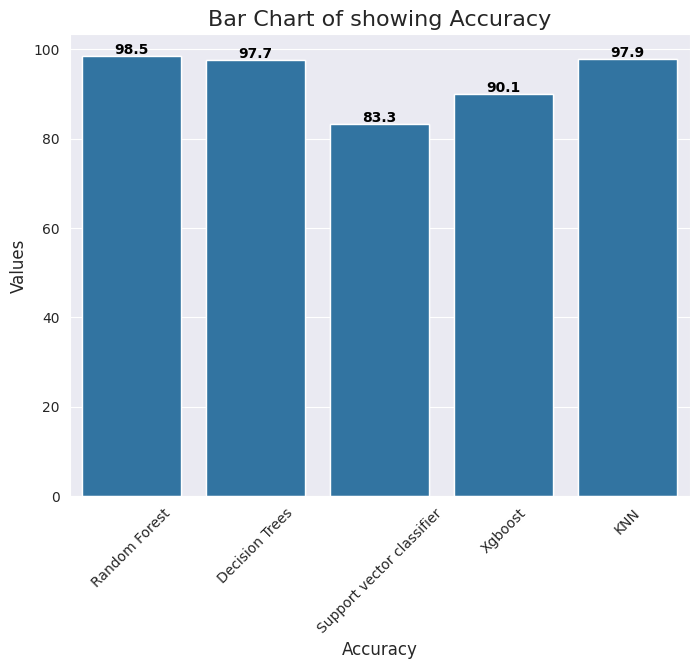

In [ ]:
#FOR ACCURACY

Accuracy = ['Random Forest', 'Decision Trees', 'Support vector classifier', 'Xgboost', 'KNN']


values = [98.5, 97.7, 83.3, 90.1, 97.9]


sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x= Accuracy, y=values, color = 'orange')

sns.barplot(x= Accuracy, y= values)

# labels and title
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Bar Chart of showing Accuracy', fontsize=16)

# to rotate
plt.xticks(rotation=45)

for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), color='black', fontweight='bold', horizontalalignment='center')

# Show the plot
plt.show()

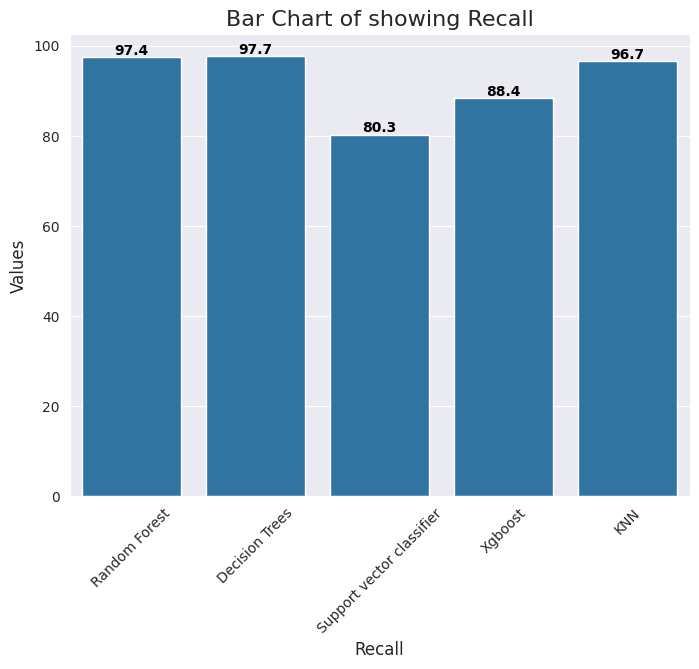

In [ ]:
#FOR RECALL


Recall = ['Random Forest', 'Decision Trees', 'Support vector classifier', 'Xgboost', 'KNN']


values = [97.4, 97.7, 80.3, 88.4, 96.7]


sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=Recall, y=values, color = 'orange')

sns.barplot(x= Recall, y= values)

# labels and title
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Bar Chart of showing Recall', fontsize=16)

# to rotate
plt.xticks(rotation=45)

for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), color='black', fontweight='bold', horizontalalignment='center')

# Show the plot
plt.show()

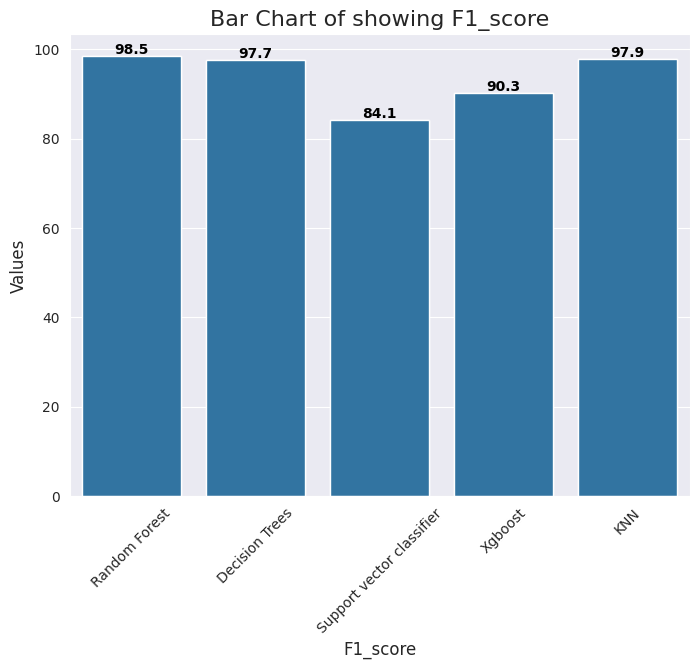

In [ ]:
#FOR F1_SCORE


F1_score = ['Random Forest', 'Decision Trees', 'Support vector classifier', 'Xgboost', 'KNN']


values = [98.5, 97.7, 84.1, 90.3 , 97.9]


sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=F1_score, y=values, color = 'orange')


sns.barplot(x= F1_score, y= values)

# labels and title
plt.xlabel('F1_score', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Bar Chart of showing F1_score', fontsize=16)

# to rotate
plt.xticks(rotation=45)

for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), color='black', fontweight='bold', horizontalalignment='center')

# Show the plot
plt.show()

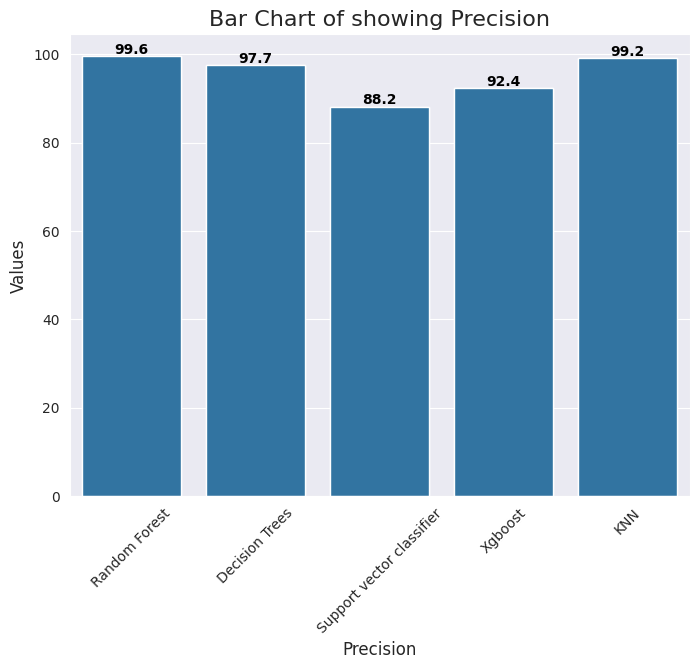

In [ ]:
#FOR PRECISION


Precision = ['Random Forest', 'Decision Trees', 'Support vector classifier', 'Xgboost', 'KNN']


values = [99.6, 97.7, 88.2, 92.4, 99.2]


sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x= Precision, y=values, color = 'orange')


sns.barplot(x= Precision, y= values)

# labels and title
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Bar Chart of showing Precision', fontsize=16)

# to rotate
plt.xticks(rotation=45)

for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), color='black', fontweight='bold', horizontalalignment='center')

# Show the plot
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

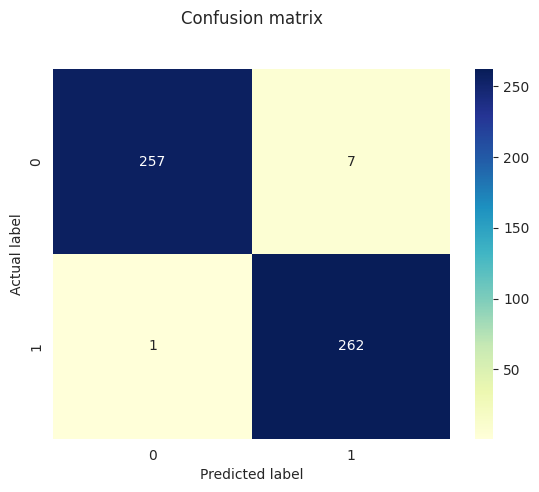

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
Y_pred_rf = rf_model.predict(X_test)
con_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)
p = sns.heatmap(pd.DataFrame(con_matrix), annot = True, cmap = "YlGnBu", fmt =
'g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')